In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('train.csv')
print(data.columns)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [4]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
print('Data shape',data.shape)
print('Data size',data.size)

Data shape (20800, 5)
Data size 104000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


In [22]:
data = data.dropna(axis = 0)

In [24]:
data.shape

(18285, 5)

In [25]:
data.reset_index(inplace = True)

In [27]:
data.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [28]:
news = data.copy()

In [30]:
X = news.drop(['label'],axis = 1)

In [31]:
y = news['label']

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
stemmer = PorterStemmer()
corpus = []
for i in range(0,len(news)):
    review = re.sub('[^a-zA-Z]',' ', news['title'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range =(1,4))
X = cv.fit_transform(corpus).toarray()


In [50]:
print(X.shape)
print(y.shape)


(18285, 5000)
(18285,)


In [53]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 4),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [54]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'abus new york time',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

#Note that the Text-Preprocessing involves removing the stopwords too!

In [64]:
print(cv.get_stop_words())

None


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size = 0.25)


In [69]:
print(x_train.shape)
print(x_test.shape)

(13713, 5000)
(4572, 5000)


In [79]:
sample = pd.DataFrame(x_train, columns = cv.get_feature_names() )
sample.head(10)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zone new york time,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy score of Naive bayes model 0.8932633420822397


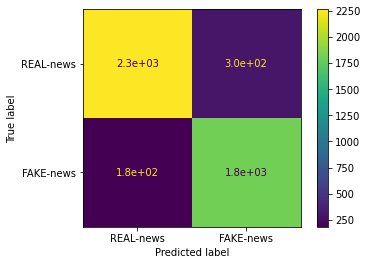

In [138]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

nb = MultinomialNB(alpha = 1)
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
score = accuracy_score(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

print('Accuracy score of Naive bayes model',score)
plot_confusion_matrix(nb,x_test,y_test,display_labels = ['REAL-news', 'FAKE-news'])

In [139]:
nb.get_params()

{'alpha': 1, 'class_prior': None, 'fit_prior': True}

In [174]:
for alpha in np.arange(0,1.5,0.15):
    nb_new = MultinomialNB(alpha = alpha)
    nb_new.fit(x_train,y_train)
    y_pred1 = nb_new.predict(x_test)
    score_new = accuracy_score(y_test,y_pred1)
    matrix = confusion_matrix(y_test,y_pred1)

    print('Accuracy score of Naive bayes model',score_new)

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy score of Naive bayes model 0.8871391076115486
Accuracy score of Naive bayes model 0.8947944006999126
Accuracy score of Naive bayes model 0.8941382327209099
Accuracy score of Naive bayes model 0.8941382327209099
Accuracy score of Naive bayes model 0.8947944006999126
Accuracy score of Naive bayes model 0.8943569553805775
Accuracy score of Naive bayes model 0.8937007874015748
Accuracy score of Naive bayes model 0.8937007874015748
Accuracy score of Naive bayes model 0.8937007874015748
Accuracy score of Naive bayes model 0.894575678040245


In [176]:
nb_new.coef_

array([[ -8.83858632,  -8.83858632,  -9.36311079, ..., -10.53318204,
         -8.59791029,  -9.62432629]])

In [190]:
sorted(zip(nb_new.coef_[0], cv.get_feature_names()))[:100]

[(-10.533182041984738, 'abroad'),
 (-10.533182041984738, 'abus new'),
 (-10.533182041984738, 'abus new york'),
 (-10.533182041984738, 'abus new york time'),
 (-10.533182041984738, 'act new'),
 (-10.533182041984738, 'act new york'),
 (-10.533182041984738, 'act new york time'),
 (-10.533182041984738, 'advic'),
 (-10.533182041984738, 'advis new'),
 (-10.533182041984738, 'advis new york'),
 (-10.533182041984738, 'advis new york time'),
 (-10.533182041984738, 'age new'),
 (-10.533182041984738, 'age new york'),
 (-10.533182041984738, 'age new york time'),
 (-10.533182041984738, 'agenda breitbart'),
 (-10.533182041984738, 'ahead trump'),
 (-10.533182041984738, 'airbag'),
 (-10.533182041984738, 'aleppo new'),
 (-10.533182041984738, 'aleppo new york'),
 (-10.533182041984738, 'aleppo new york time'),
 (-10.533182041984738, 'ali'),
 (-10.533182041984738, 'america breitbart'),
 (-10.533182041984738, 'america new'),
 (-10.533182041984738, 'america new york'),
 (-10.533182041984738, 'america new yor